In [1]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
def process_tweet(tweet):
 stemmer=PorterStemmer()
 stopwords_english = stopwords.words('english')
 tweet = re.sub(r'\$\w*', '', tweet)
 tweet = re.sub(r'^RT[\s]+', '', tweet)
 tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
 tweet = re.sub(r'#', '', tweet)
 tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
 tweet_tokens = tokenizer.tokenize(tweet)

 tweets_clean = []
 for word in tweet_tokens:
    if (word not in stopwords_english and
            word not in string.punctuation):
        stem_word = stemmer.stem(word)  # stemming word
        tweets_clean.append(stem_word)

 return tweets_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets=all_positive_tweets+all_negative_tweets

print("number of tweets:",len(tweets))

number of tweets: 10000


In [4]:
label = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

In [5]:
dictionary={'key1':1,'key2':2}

In [6]:
dictionary['key3'] = -5

dictionary['key1'] =0

print(dictionary)

print(dictionary['key1'])

{'key1': 0, 'key2': 2, 'key3': -5}
0


In [7]:
if 'key1' in dictionary:
  print('item found:', dictionary['key1'])
else:
  print('key1 is not defined')

print('item found:', dictionary.get('key1',-1))

item found: 0
item found: 0


In [8]:
if 'key1' in dictionary:
  print('item found:', dictionary['key1'])
else:
  print('key1 is not defined')

print(dictionary.get('key7', -1))

item found: 0
-1


In [9]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [10]:
freqs = build_freqs(tweets,label)
print(freqs)



{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3568, ('hey', 1.0): 76, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 97, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 620, ('listen', 1.0): 16, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 129, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 400, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [11]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []

for word in keys:
  pos=0
  neg=0

  if (word, 1) in freqs:
    pos = freqs[(word,1)]

  if (word, 0) in freqs:
    neg = freqs[(word, 0)]

  data.append([word, pos, neg])

data


[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

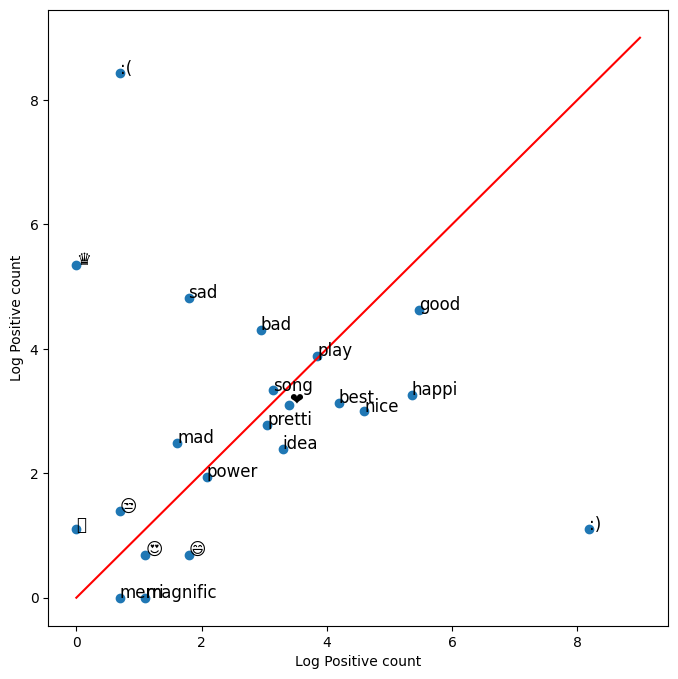

In [16]:
Fig, ax = plt.subplots(figsize = (8,8))

x = np.log([x[1]+1 for x in data])

y = np.log([x[2]+1 for x in data])

ax.scatter(x,y)

plt.xlabel('Log Positive count')
plt.ylabel('Log Positive count')

for i in range(0, len(data)):
 ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0,9],[0,9], color='red')
plt.show()